In [1]:
import pandas as pd

/var/folders/4q/s41bc49s2rq_883tkzfprrnw0000gn/T/ipykernel_7210/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import snowflake.connector

In [9]:
conn = snowflake.connector.connect(
    user='mewanmadhusha',
    password='/Applejg8269',
    account='whvtigk-as57496',
    warehouse='COMPUTE_WH',
    database='COVID19_EPIDEMIOLOGICAL_DATA',
    schema='PUBLIC'
)

In [10]:
query = 'SELECT * FROM OWID_VACCINATIONS LIMIT 10'

In [11]:
covid_data = pd.read_sql(query, conn)

/var/folders/4q/s41bc49s2rq_883tkzfprrnw0000gn/T/ipykernel_7210/531883970.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  covid_data = pd.read_sql(query, conn)


In [12]:
print("Dataset Info:")
print(covid_data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   DATE                                 10 non-null     object        
 1   COUNTRY_REGION                       10 non-null     object        
 2   ISO3166_1                            10 non-null     object        
 3   TOTAL_VACCINATIONS                   2 non-null      float64       
 4   PEOPLE_VACCINATED                    2 non-null      float64       
 5   PEOPLE_FULLY_VACCINATED              0 non-null      object        
 6   DAILY_VACCINATIONS_RAW               0 non-null      object        
 7   DAILY_VACCINATIONS                   9 non-null      float64       
 8   TOTAL_VACCINATIONS_PER_HUNDRED       2 non-null      float64       
 9   PEOPLE_VACCINATED_PER_HUNDRED        2 non-null      float64       
 10  PEO

In [13]:
conn.close()

In [14]:
from pyspark.sql import SparkSession
import pandas as pd

# Create a Spark session
spark = SparkSession.builder.appName("PandasToSpark").getOrCreate()

24/01/24 19:47:04 WARN Utils: Your hostname, Mewans-MacBook-Air-M1.local resolves to a loopback address: 127.0.0.1; using 192.168.201.38 instead (on interface en0)
24/01/24 19:47:04 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/01/24 19:47:04 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [15]:
print("Dataset Info:")
print(covid_data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   DATE                                 10 non-null     object        
 1   COUNTRY_REGION                       10 non-null     object        
 2   ISO3166_1                            10 non-null     object        
 3   TOTAL_VACCINATIONS                   2 non-null      float64       
 4   PEOPLE_VACCINATED                    2 non-null      float64       
 5   PEOPLE_FULLY_VACCINATED              0 non-null      object        
 6   DAILY_VACCINATIONS_RAW               0 non-null      object        
 7   DAILY_VACCINATIONS                   9 non-null      float64       
 8   TOTAL_VACCINATIONS_PER_HUNDRED       2 non-null      float64       
 9   PEOPLE_VACCINATED_PER_HUNDRED        2 non-null      float64       
 10  PEO

In [28]:
import snowflake.connector
import pandas as pd

# Step 2: Connect to Snowflake and fetch COVID-19 dataset
conn = snowflake.connector.connect(
    user='mewanmadhusha',
    password='/Applejg8269',
    account='whvtigk-as57496',
    warehouse='COMPUTE_WH',
    database='COVID19_EPIDEMIOLOGICAL_DATA',
    schema='PUBLIC'
)

# query = 'SELECT * FROM ECDC_GLOBAL'

query = 'SELECT COUNTRY_REGION,SUM(DEATHS) AS TotalDeaths FROM ECDC_GLOBAL GROUP BY COUNTRY_REGION'

# Fetch data into a Pandas DataFrame for analysis
covid_data = pd.read_sql(query, conn)

# Step 3: Explore the dataset
# Display basic information about the dataset, such as columns, data types, and null values
print("Dataset Info:")
print(covid_data.info())

# Display the first few rows of the dataset to understand its structure
print("\nFirst few rows of the dataset:")
print(covid_data.head())

happy_table_2020 = pd.read_csv('2020.csv')

# https://www.kaggle.com/code/agirlcoding/happyness-report/input?select=2020.csv
happy_table_2019 = pd.read_csv('2019.csv')


/var/folders/4q/s41bc49s2rq_883tkzfprrnw0000gn/T/ipykernel_7210/3664406339.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  covid_data = pd.read_sql(query, conn)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   COUNTRY_REGION  214 non-null    object 
 1   TOTALDEATHS     214 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.5+ KB
None

First few rows of the dataset:
  COUNTRY_REGION  TOTALDEATHS
0    Afghanistan       1971.0
1        Albania       1003.0
2        Algeria       2596.0
3        Andorra         79.0
4         Angola        371.0


In [51]:
merged_data = pd.merge(covid_data, happy_table_2019, left_on='COUNTRY_REGION', right_on='Country or region', how='inner')

In [52]:
import matplotlib.pyplot as plt

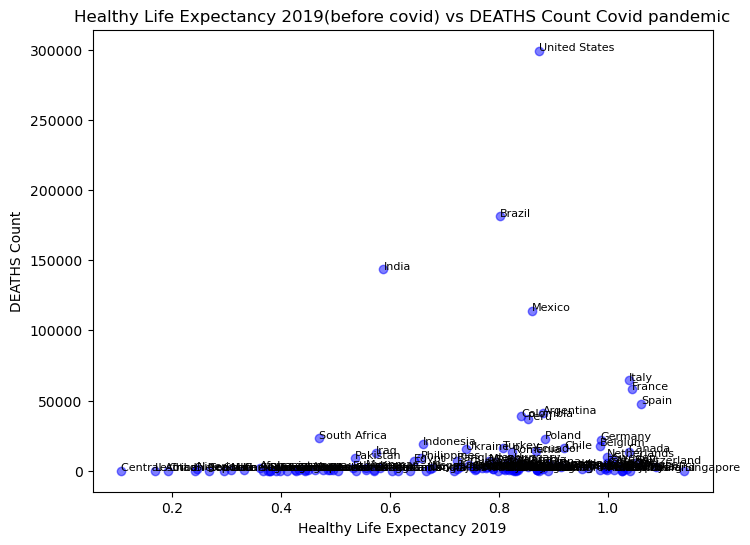

In [62]:
plt.figure(figsize=(8, 6))

# Scatter plot of Healthy life expectancy vs DEATHS count
plt.scatter(merged_data['Healthy life expectancy'], merged_data['TOTALDEATHS'], alpha=0.5, color='blue')
plt.title('Healthy Life Expectancy 2019(before covid) vs DEATHS Count Covid pandemic')
plt.xlabel('Healthy Life Expectancy 2019')
plt.ylabel('DEATHS Count')

for i, row in merged_data.iterrows():
    plt.text(row['Healthy life expectancy'], row['TOTALDEATHS'], row['COUNTRY_REGION'], fontsize=8)


In [55]:
# next compare with 2020 dataset

merged_data2 = pd.merge(covid_data, happy_table_2020, left_on='COUNTRY_REGION', right_on='Country name', how='inner')

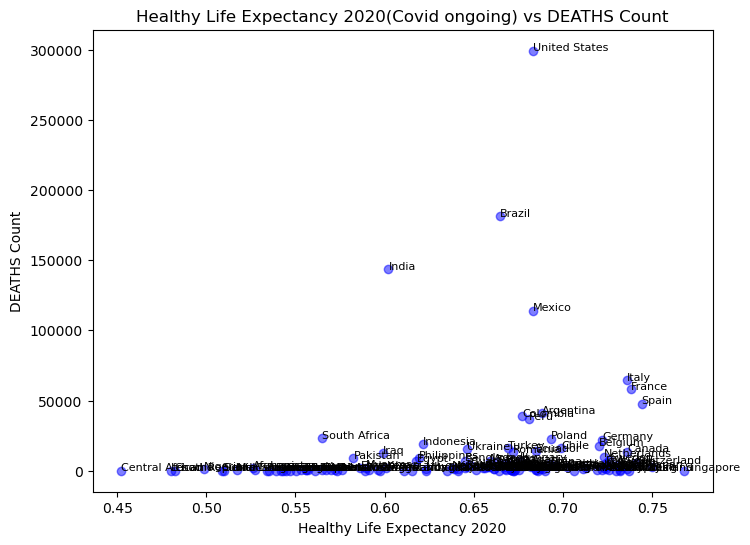

In [61]:
plt.figure(figsize=(8, 6))

# Scatter plot of Healthy life expectancy vs DEATHS count
plt.scatter(merged_data2['Healthy life expectancy']/100, merged_data2['TOTALDEATHS'], alpha=0.5, color='blue')
plt.title('Healthy Life Expectancy 2020(Covid ongoing) vs DEATHS Count')
plt.xlabel('Healthy Life Expectancy 2020')
plt.ylabel('DEATHS Count')

for i, row in merged_data2.iterrows():
    plt.text(row['Healthy life expectancy']/100, row['TOTALDEATHS'], row['COUNTRY_REGION'], fontsize=8)


In [48]:
plt.tight_layout()


<Figure size 640x480 with 0 Axes>

In [50]:
plt.show()

In [65]:
conn.close()